<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования** - проверить гипотезы:
1. Квартиры на первом и последнем этаже дешевле квартир на других этажах.
2. Стоимость квартиры снижается по мере удаления от центра.
3. Квартиры с большей площадью дороже.
4. С увеличением количества комнат стоимость квартиры увеличивается.
5. Стоимость квартиры зависит от дня недели, в который было размещено объявление о продаже.

**Задачи исследования**:
1. Изучить общую информацию о данных.
2. Обработать пропущенные значения в данных.
3. Посчитать и добавить в таблицу:
*а) цену квадратного метра;*
*б) день недели, месяц и год публикации объявления;*
*в) этаж квартиры; варианты — первый, последний, другой;*
*г) соотношение жилой и общей площади, а также отношение площади кухни к общей.*
4. Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Построить гистограммы для каждого параметра.
5. Изучить время продажи квартир.
6. Убрать редкие и выбивающиеся значения.
7. Выявить факторы, влияющие на стоимость квартир.
8. Выбрать 10 населённых пунктов с наибольшим числом объявлений.
9. Выделить населённые пункты с самой высокой и низкой стоимостью жилья.
10. Проанализировать квартиры в центре.
11. Сделать общий вывод.

## Изучение данных из файла

Для начала работы необходимо добавить библиотеку pandas, которая является основным инструментом.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb

Прочитаем файл с данными и сохраним его как df.
Для корректного отображения данных необходимо добавить разделитель, которым в даннос случае является "\t"

In [2]:
try:
    df = pd.read_csv('/datasets/real_estate_data.csv',  sep='\t')
except: 
    df = pd.read_csv('/download/data.csv', sep='\t')

Получим первые 10 строк таблицы df. На этом этапе стало видно, что данные "склеились", нужно вернуться на шаг назад и добавить разделитель.

In [3]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Получим общую информацию о данных в таблице df

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Итак, в таблице 22 столбца с разным типом данных - int64 (3 столбца), float64 (14 столбцов), object (3 столбца), bool (2 стоблца). 

Согласно документации к данным:
**airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)
**balcony** — число балконов
**ceiling_height** — высота потолков (м)
**cityCenters_nearest** — расстояние до центра города (м)
**days_exposition** — сколько дней было размещено объявление (от публикации до снятия)
**first_day_exposition** — дата публикации
**floor** — этаж
**floors_total** — всего этажей в доме
**is_apartment** — апартаменты (булев тип)
**kitchen_area** — площадь кухни в квадратных метрах (м²)
**last_price** — цена на момент снятия с публикации
**living_area** — жилая площадь в квадратных метрах (м²)
**locality_name** — название населённого пункта
**open_plan** — свободная планировка (булев тип)
**parks_around3000** — число парков в радиусе 3 км
**parks_nearest** — расстояние до ближайшего парка (м)
**ponds_around3000** — число водоёмов в радиусе 3 км
**ponds_nearest** — расстояние до ближайшего водоёма (м)
**rooms** — число комнат
**studio** — квартира-студия (булев тип)
**total_area** — площадь квартиры в квадратных метрах (м²)
**total_images** — число фотографий квартиры в объявлении

Необходимо переименовать столбец cityCenters_nearest, так как он только частично написан змеиным регистром.

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

В некоторых стобцах нужно изменить тип данных с float64 на int64. К этим столбцам относятся: floors_total, balcony, parks_around3000, ponds_around3000, days_exposition. Это необходимо сделать, так как данные в указанных столбцах всегда исчисляются целыми числами, в датафрейме после точки стоит 0.
Также можно округлить до целого значения данные в следующих столбцах: airports_nearest, ceiling_height, cityCenters_nearest, parks_nearest, ponds_nearest.

Подсчитаем количество пропусков в датасете.

In [5]:
print(df.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


### Вывод

Исходя из обзора данных видно, что в данных есть некоторые проблемы:
1. название столбца, нарушающее правила стиля;
2. неподходящий тип данных;
3. пропущенные значения.

Переименовать столбец можно сразу, а изменить тип данных только после заполнения пропусков.

## Предобработка данных

Переименуем столбец cityCenters_nearest в city_centers_nearest, в этом случае будет использован змеиный регистр и исчезнет заглавная буква.

In [6]:
df.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace = True)

Проверим уникальные значения в каждом столбце. Начнём со столбца airports_nearest.

37434.0    61
21928.0    32
39946.0    30
44870.0    30
18732.0    27
           ..
53478.0     1
20335.0     1
33699.0     1
26945.0     1
20875.0     1
Name: airports_nearest, Length: 8275, dtype: int64


count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

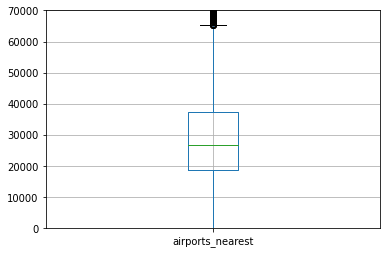

In [7]:
print(df['airports_nearest'].value_counts())

plt.ylim(0,70000) 
df.boxplot(['airports_nearest'])

df['airports_nearest'].describe() 

Значения сильно различаются, также график определяет значения больше 65000 как выбросы. Так как в таблице с данными есть сведения о квартирах, которые находятся на севере Ленинградской области, то до аэропорта, расположенного на юге Санкт-Петербурга, действительно далеко. Эти данные могут быть реальными, удалять их не будем, а пропуски, которые могли возникнуть по причине того, что человек не знает удалённость аэропорта, в столбце заполним медианным значением.

In [8]:
df['airports_nearest'] = df['airports_nearest'].fillna(df['airports_nearest'].median())

Округлим данные и приведеём их к целочисленному значению.

In [9]:
df['airports_nearest'] = df['airports_nearest'].round()

In [10]:
df['airports_nearest'] = df['airports_nearest'].astype('int')

Заменим пропуски в столбце balcony на 0 и сразу изменим тип данных.

In [11]:
df['balcony'] = df['balcony'].fillna(0)

In [12]:
df['balcony'] = df['balcony'].astype('int')

Проверим уникальные значения в столбце balcony.

0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64


<AxesSubplot:>

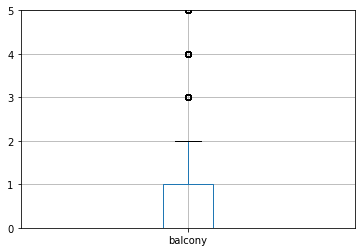

In [13]:
print(df['balcony'].value_counts())

plt.ylim(0,5) 
df.boxplot(['balcony'])

Если построить ящик с усами, то выбросами на нём омечены все значения, превышающие 2. Удалим выбросы.

In [14]:
df = df[(df.balcony <= 2)]

Проверим уникальные значения в столбце ceiling_height.

2.50     3452
2.60     1593
2.70     1524
3.00     1060
2.55      957
         ... 
22.60       1
4.90        1
5.20        1
2.49        1
4.65        1
Name: ceiling_height, Length: 181, dtype: int64


count    14058.000000
mean         2.760489
std          0.918138
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max         32.000000
Name: ceiling_height, dtype: float64

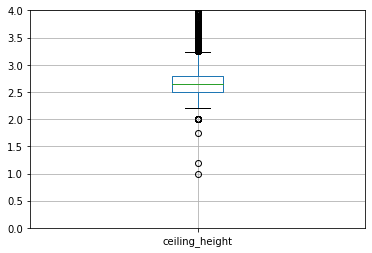

In [15]:
print(df['ceiling_height'].value_counts())

plt.ylim(0,4) 
df.boxplot(['ceiling_height'])

df['ceiling_height'].describe() 

В таблице можно заметить необоснованно большие значения высоты потолков и слишком низкие. Избавимся от них.
Так как в старых домах Санкт-Петербурга могут сохраниться потолки выше тех, что отмечены на графике 3.3 метра, то округлим это значение до 5 метров, а всё, что выше, удалим. Также в столбце есть пропуски, возможно, перед продажей не смогли измерить высоту потолков, а в документах такой информации не нашлось. Заполним медианой.

In [16]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [17]:
df = df[(df.ceiling_height <= 5.0) & (df.ceiling_height >= 2.0)]

Поменяла шаги местами, спасибо за замечание.

In [18]:
df['ceiling_height'] = df[df['ceiling_height'].notnull()]['ceiling_height'].round(1)

Проверим уникальные значения в столбце city_centers_nearest.

8460.0     58
10720.0    29
8434.0     27
20444.0    25
20802.0    25
           ..
12747.0     1
8767.0      1
29890.0     1
9884.0      1
4234.0      1
Name: city_centers_nearest, Length: 7570, dtype: int64


count    17708.000000
mean     14175.833465
std       8620.052399
min        181.000000
25%       9187.750000
50%      13094.000000
75%      16294.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

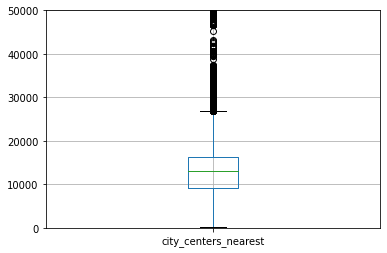

In [19]:
print(df['city_centers_nearest'].value_counts())

plt.ylim(0,50000) 
df.boxplot(['city_centers_nearest'])

df['city_centers_nearest'].describe() 

На данном графике можно заметить много больших выбросов, но сложно сказать действительно ли они являются слишком высокими значениями (выбросами) или населённый пункт расположен уже в Ленинградской области, слишком далеко от центра Санкт-Петербурга. Эти данные пока трогать не будем.

Заполним пропуски в данных медианным значением.

In [21]:
df['city_centers_nearest'] = df['city_centers_nearest'].fillna(df['city_centers_nearest'].median())

Округлим данные.

In [22]:
df['city_centers_nearest'] = df['city_centers_nearest'].round()

В этом месте код работает через раз, не понимаю причины. Иногда код работает при округлении и изменении типа данных в одной строке, иногда если разбить их на две отдельные строчки. Сейxас выдаёт ошибку при обоих вариантах. Я оставила данные в типе float64.

Проверим уникальные значения в столбце days_exposition.

45.0      868
60.0      527
7.0       224
30.0      205
90.0      190
         ... 
818.0       1
969.0       1
1147.0      1
1148.0      1
1174.0      1
Name: days_exposition, Length: 1136, dtype: int64


count    20030.000000
mean       180.712232
std        219.747753
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1572.000000
Name: days_exposition, dtype: float64

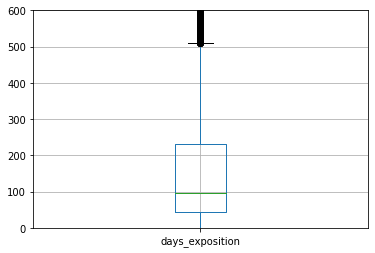

In [23]:
print(df['days_exposition'].value_counts())

plt.ylim(0,600) 
df.boxplot(['days_exposition'])

df['days_exposition'].describe() 

Так как на скорость продажи квартиры влияет множество факторов, то невозможно достоверно определить сколько дней продавались квартиры, у которых данный пункт не указан. Не будем заполнять пропуски в этом столбце.

В данных замечены выбросы, а максимальное значение равно 1572 дня. Вряд ли квартира продавалась так долго, это 4,3 года. Вероятно, объявление забыли удалить. На графике выбросами отмечены значения больше 510 дней. Больше 75% данных меньше этого значения. Так как на продаваемость квартиры влияют разные факторы и продажа действительно может занимать больше времени, стоит увеличить это значение до 560 дней.

In [24]:
df = df[(df.days_exposition <= 560)]

Проверим уникальные значения в столбце first_day_exposition.

In [25]:
print(df['first_day_exposition'].value_counts())

2018-02-01T00:00:00    346
2017-11-10T00:00:00    227
2017-10-13T00:00:00    117
2017-09-27T00:00:00    107
2018-07-10T00:00:00     90
                      ... 
2015-08-21T00:00:00      1
2016-09-09T00:00:00      1
2015-12-29T00:00:00      1
2017-01-15T00:00:00      1
2016-10-26T00:00:00      1
Name: first_day_exposition, Length: 1354, dtype: int64


Время публикации объявления не указано, поэтому изменим формат отображения данных, оставив только дату.

In [26]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')

Проверим уникальные значения в столбце floor.

2     2608
3     2409
1     2255
4     2165
5     2040
6     1031
7      956
9      872
8      854
10     549
12     440
11     425
13     312
14     270
15     269
16     262
17     188
18     143
19     120
21     106
20      93
22      88
23      86
24      47
25      36
26      21
27      10
32       1
28       1
33       1
31       1
Name: floor, dtype: int64


count    18659.000000
mean         5.983279
std          4.938971
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

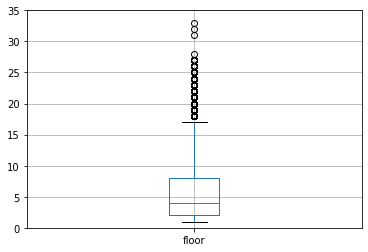

In [27]:
print(df['floor'].value_counts())

plt.ylim(0,35) 
df.boxplot(['floor'])

df['floor'].describe() 

Значения различаются, среднее совсем небольшое. Не будем удалять данные, отмеченные на графике выбросами, так как это могут быть жилищные ккомплексы с большой этажностью. Я поискала в интернете, в Санкт-Петербурге есть ЖК с похожей этажностью.

Округлим значения столбца и приведём их к целочисленному значению.

In [28]:
df['floor'] = df['floor'].round().astype('int')

Проверим уникальные значения в столбце floors_total.

5.0     4500
9.0     3049
12.0    1112
16.0    1082
25.0     907
10.0     901
4.0      883
6.0      665
17.0     657
3.0      507
14.0     456
7.0      418
18.0     412
24.0     379
15.0     294
23.0     293
19.0     290
2.0      277
8.0      277
22.0     238
20.0     219
13.0     185
27.0     141
11.0     139
21.0     138
26.0     107
1.0       20
35.0      18
28.0      16
60.0       1
34.0       1
29.0       1
36.0       1
52.0       1
33.0       1
Name: floors_total, dtype: int64


count    18586.000000
mean        10.875067
std          6.668417
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

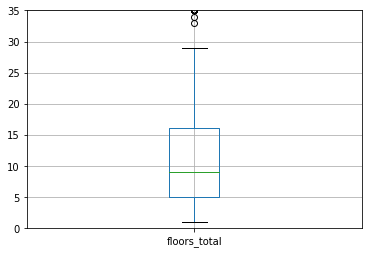

In [29]:
print(df['floors_total'].value_counts())

plt.ylim(0,35) 
df.boxplot(['floors_total'])

df['floors_total'].describe() 

Здесь удалим строки, в которых этажность больше 28 этажей - эти значения сильно выделяются на графике и в реальной жизни.

In [30]:
df = df[(df.floors_total <= 28)]

Изменим тип данных.

In [31]:
df['floors_total'] = df['floors_total'].astype('int')

Проверим уникальные значения в столбце kitchen_area.

In [32]:
print(df['kitchen_area'].value_counts())

6.00     1079
10.00    1033
8.00      889
7.00      876
9.00      864
         ... 
13.43       1
16.46       1
8.12        1
41.30       1
26.60       1
Name: kitchen_area, Length: 825, dtype: int64


В площади кухни есть необоснованно маленькие и большие значения. Возможно, в некоторых квартирах кухня объединена с гостиной, тогда площадь такой комнаты действительно может быть больше.

<AxesSubplot:>

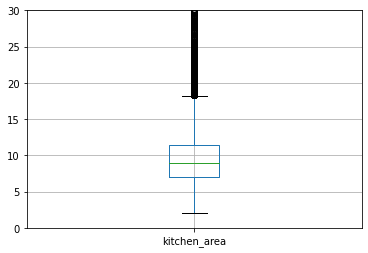

In [33]:
plt.ylim(0,30) 
df.boxplot(['kitchen_area'])

Нижний «ус» немного не доходит до 0, минимальное значение примерно 1. Верхний "ус" заканчивается около 18 квадратных метров. Это ориентировочная граница нормального размаха. Всё, что лежит за ней, считается выбросом. Более высокие значения рисуются отдельными точками, но сливаются в единую жирную линию: таких выбросов очень много.
И всё же значения, которые отсёк верхний «ус», — редкие. Видно, насколько медиана (зелёная линия) не стремится к длинному хвосту высоких значений. Тем не менее, если предположение об объединённой кухне и гостиной верно, то реальные значения могут быть выше верхнего уса. Удалим значения больше 25 квадратных метров.
Заметные на гистограмме нюансы распределения хорошо бы зафиксировать в числах: иметь под рукой среднее, медиану, количество наблюдений в выборке и разброс их значений.

In [34]:
df['kitchen_area'].describe() 

count    16643.000000
mean        10.252105
std          5.440045
min          2.000000
25%          7.000000
50%          9.000000
75%         11.500000
max        112.000000
Name: kitchen_area, dtype: float64

Заполним пропуски в столбце медианным значением.

In [35]:
df['kitchen_area'] = df['kitchen_area'].fillna((df['kitchen_area'].median())).astype('int')

Удалим строки, в которых площадь кухни меньше 7 и больше 19.

In [36]:
df = df[(df.kitchen_area > 7.0) & (df.kitchen_area <= 25.0)]

Проверим уникальные значения в столбце last_price.

4500000.0     194
3500000.0     138
4300000.0     136
5500000.0     135
4000000.0     131
             ... 
3204000.0       1
2204000.0       1
14174400.0      1
4635000.0       1
20990000.0      1
Name: last_price, Length: 2140, dtype: int64


count    1.294300e+04
mean     6.352295e+06
std      9.264855e+06
min      4.300000e+05
25%      3.600000e+06
50%      4.900000e+06
75%      7.000000e+06
max      7.630000e+08
Name: last_price, dtype: float64

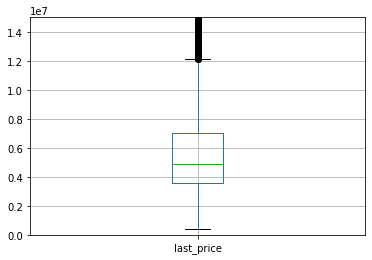

In [37]:
print(df['last_price'].value_counts())

plt.ylim(0,15000000) 
df.boxplot(['last_price'])

df['last_price'].describe() 


Верхний ус упирается в отметку 12000000, посчитаем, что часть квартир на самом деле стоит больше 12000000 из-за различных факторов. Удалим значения, которые выше 20000000.

In [38]:
df = df[(df.last_price <= 20000000)]

Округлим значения и изменим их тип.

In [39]:
df['last_price'] = df['last_price'].round().astype('int')

Проверим уникальные значения в столбце living_area.

18.000000    466
17.000000    369
20.000000    346
16.000000    331
30.000000    273
            ... 
30.099998      1
14.950000      1
16.630000      1
35.380000      1
16.740000      1
Name: living_area, Length: 1245, dtype: int64


count    11203.000000
mean        32.096684
std         17.234496
min          2.000000
25%         18.000000
50%         30.000000
75%         42.000000
max        199.000000
Name: living_area, dtype: float64

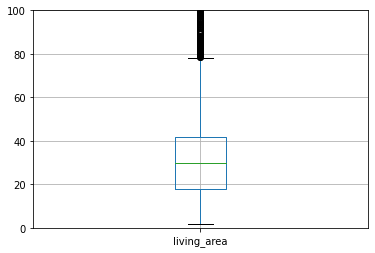

In [40]:
print(df['living_area'].value_counts())

plt.ylim(0,100) 
df.boxplot(['living_area'])

df['living_area'].describe() 

Заполним пропуски в данных.

In [41]:
df['living_area'] = df['living_area'].fillna(df['living_area'].median())

В соответствии с графиком минимальная общая площадь равна 2 квадратных метра, таких квартир и жилых комнат просто не существует. Удалим значения меньше 10 и больше 90 квадратных метров, так как они не похожи на реальные.

In [42]:
df = df[(df.living_area <= 90) & (df.living_area >= 10)]

Округлим значения и приведём их к целому числу.

In [43]:
df['living_area'] = df['living_area'].round().astype('int')

Проверим уникальные значения в столбце locality_name.

In [44]:
print(df['locality_name'].value_counts())

Санкт-Петербург                  8128
посёлок Мурино                    464
посёлок Шушары                    352
посёлок Парголово                 277
деревня Кудрово                   265
                                 ... 
поселок Калитино                    1
деревня Шпаньково                   1
поселок Глажево                     1
поселок Жилгородок                  1
поселок Пансионат Зелёный Бор       1
Name: locality_name, Length: 280, dtype: int64


В данном столбце есть пропуски, так как в нём множество разных населённых пунктов, заполнить пропущенные значения не получится. Строки с пропусками лучше удалить.

In [45]:
df = df[pd.notnull(df['locality_name'])]

Столбцы parks_around3000, parks_nearest, ponds_around3000, ponds_nearest не используются для анализа, поэтому не будем их обрабатывать.

Проверим уникальные значения в столбце rooms, а также построим ящик с усами. 

1    5033
2    4013
3    2755
4     439
0     168
5      87
6       9
7       4
9       1
Name: rooms, dtype: int64


count    12509.000000
mean         1.887121
std          0.943419
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          9.000000
Name: rooms, dtype: float64

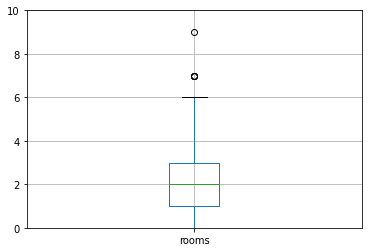

In [46]:
print(df['rooms'].value_counts())

plt.ylim(0,10) 
df.boxplot(['rooms'])

df['rooms'].describe() 

Нижний «ус» упирается в 0, минимальное значение 1. Верхний "ус" заканчивается на 6 комнатах. Это ориентировочная граница нормального размаха. Тем не менее, самое большое значение равно 9 и объявлений с квартирами, с таким количеством комнат немного. Не будем удалять эти строки. К тому же, могут продавать несколько комнат в коммунальной квартире. Приведём данные к целочисленному типу.

In [47]:
df['rooms'] = df['rooms'].astype('int')

Проверим уникальные значения в столбце total_area.

40.00     242
42.00     197
36.00     195
38.00     185
60.00     166
         ... 
25.48       1
37.77       1
25.33       1
127.78      1
55.06       1
Name: total_area, Length: 1505, dtype: int64


count    12509.000000
mean        56.961839
std         22.128522
min         12.000000
25%         39.900000
50%         53.000000
75%         70.000000
max        263.800000
Name: total_area, dtype: float64

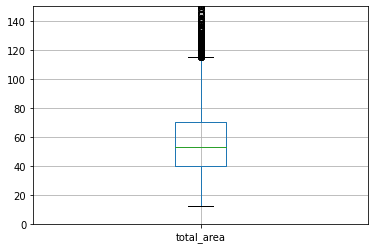

In [48]:
print(df['total_area'].value_counts())

plt.ylim(0,150) 
df.boxplot(['total_area'])

df['total_area'].describe() 

Минимальное значение 12 квадратных метров, оно не является выбросом. Максимальное - 263 квадратных метров, квартиру такой площади представить сложно. Ящик с усами определяет в качестве выбросов значения, которые лежат больше 118 квадратных метров. Удалим их.

In [49]:
df = df[(df.total_area <= 118)]

Округлим и приведём к целочисленному значению данные в столбце.

In [50]:
df['total_area'] = df['total_area'].round().astype('int')

Проверим уникальные значения в столбце total_images.

In [51]:
print(df['total_images'].value_counts())

10    972
9     890
8     812
7     784
20    780
6     755
5     687
11    683
12    652
0     588
4     569
13    513
14    493
15    480
1     470
3     406
16    395
2     383
17    332
18    327
19    312
21     11
23      7
22      7
24      3
26      3
32      3
28      3
29      2
30      2
31      2
37      1
35      1
27      1
Name: total_images, dtype: int64


Редко встречаются объявления с 31 и 35 фотографиями (каждое значение в столбце встречается один раз), их можно удалить.

In [52]:
df = df[(df.total_images <= 21)]

Пропуски в столбце is_apartment есть пропущенные значения. Будем считать, что в этих строках не апартаменты и заполним их значением False.

In [53]:
df['is_apartment'] = df['is_apartment'].fillna(False)

### Вывод

В предобработке данных мы переименовали один столбец, приведя его к единому стилю, заполнили пропуски, а также удалили неправдоподобные выбивающиеся значения. Данные стали чище, поэтому результат дальнейшего исследования будет более реальным.

## Расчёты и добавление результатов в таблицу

Расчитаем и добавим в таблицу столбец со стоимостью квадратного метра

In [55]:
df['price_meter'] = df['last_price'] / df['total_area']

И приведём его к целочисленному значению.

In [56]:
df['price_meter'] = df['price_meter'].astype('int')

Добавим в таблицу столбец дня недели публикации

In [57]:
df['weekday'] = df['first_day_exposition'].apply(lambda x: x.isoweekday())

Теперь добавим к числовому обозначению название дня недели.

In [58]:
dict_of_weekdays = {1: 'понедельник', 2: 'вторник', 3: 'среда', 4: 'четверг', 
                    5: 'пятница', 6: 'суббота', 7: 'воскресенье'}
df['weekday'] = df['weekday'].map(dict_of_weekdays)

Добавим в таблицу столбец месяца публикации

In [59]:
df['month'] = df['first_day_exposition'].dt.month

Добавим в таблицу столбец года публикации

In [60]:
df['year'] = df['first_day_exposition'].dt.year

Напишем собственную функцию, чтобы разделить квартиры по категориям в зависимости от этажа.

In [61]:
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

И добавим новый столбец с категорией.

In [62]:
df['floor_category'] = df.apply(floor_category, axis = 1)

Добавим столбец с отношением жилой площади к общей

In [63]:
df['useful_area_ratio'] = df['living_area'] / df['total_area']

Добавим столбец с отношением площади кухни к общей площади.

In [64]:
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']

### Вывод

Мы добавили в датафрейм несколько новых столбцов, которые облегчат исследование и получение ответов на поставленные вопросы. Благодаря столбцам с днём недели, месяцем и годом публикации объявления можно проследить влияние времени публикации на цену, с помощью категоризации этажей будет проще дать ответ о наличии взаимосвязи цены и этажа, на котором расположена квартира.

## Исследовательский анализ данных

Для начала рассмотрим параметры площадь, цена, число комнат, высота потолков.

In [65]:
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,12294.000000,1.229400e+04,12294.000000,12294.000000
mean,55.737108,5.435543e+06,1.855539,2.680608
std,19.797179,2.804716e+06,0.907207,0.194690
min,12.000000,4.300000e+05,0.000000,2.000000
25%,40.000000,3.570000e+06,1.000000,2.600000
50%,52.000000,4.791000e+06,2.000000,2.600000
75%,69.000000,6.650000e+06,3.000000,2.700000
max,118.000000,2.000000e+07,7.000000,5.000000


После предобработки данных данные стали более чистыми. О содержании столбцов можно сказать следующее:
**total_area** - минимальная площадь квартиры 20 квадратных метров, максимальная 122 квадратных метра. Среднее значение 56 квадратных метров, оно выглядит довольно реалистичным.
**last_price** - стоимость квартир довольно разнообразная, но в среднем 5,5 млн.
**rooms** - разброс комнат от 1 до 5, но среднее значение равно 2 комнаты.
**ceiling_height** - в среднем высота потолков равна 2,7 метров, минимальная - 2 метра.

Построим гистограммы для каждого параметра уже очищенных от выбросов данных.

Построим гистограмму площади квартир.

<AxesSubplot:ylabel='Frequency'>

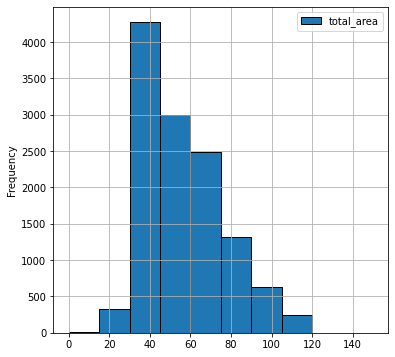

In [66]:
df.plot(y = 'total_area', kind = 'hist', bins = 10, grid=True, figsize = (6,6), range = (0,150), ec='black')

Видно, что гистограмма отражает ту же информацию, что и вызванный метод describe. Большая часть квартир находится в диапазоне между 30 и 75 квадратными метрами. Квартир с низкой или высокой площадью немного.

Построим гистограмму цены квартир.

<AxesSubplot:ylabel='Frequency'>

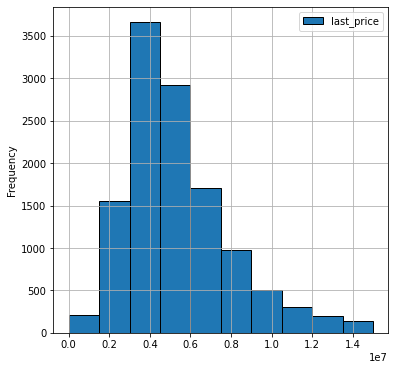

In [67]:
df.plot(y = 'last_price', kind = 'hist', bins = 10, grid=True, range = (0,15000000), figsize = (6,6), ec='black')

На гистограмме видно, что после стоимости в 6 млн. количество квартир с более высокой стоимостью резко снижается и чем выше стоимость, тем меньше в этой категории квартир.

Построим гистограмму, отражающую количество комнат в квартирах.

<AxesSubplot:ylabel='Frequency'>

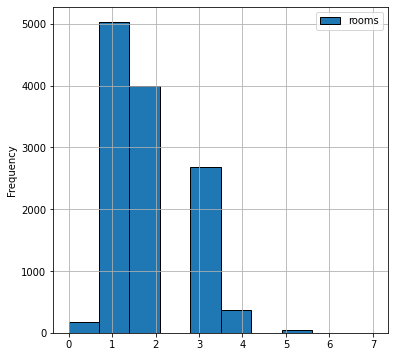

In [68]:
df.plot(y = 'rooms', kind = 'hist', bins = 10, grid=True, figsize = (6,6), ec='black')

Данная гистограмма также отражает информацию, показанную методом describe, а также value_count двумя разделами выше. Количество квартир с одной и двумя комнатами практически равно, разница незначительна. Также довольно распространены трёхкомнатные квартиры. Квартиры с четырьмя и пятью комнатами практически не встречаются.

Построим гистограмму, отражающую высоту потолков.

<AxesSubplot:ylabel='Frequency'>

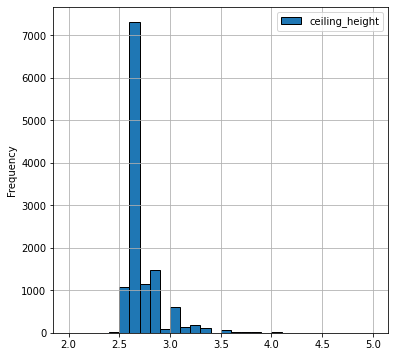

In [69]:
df.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2,5), grid=True, figsize = (6,6), ec='black')

На гистограмме видно, что в большинстве квартир высота потолков равна 2,6 метра. Квартиры, в которых высота потолков 3 метра или больше, встречаются реже.

Изучим время продажи квартиры, найдём среднее время продажи, а также долгие по дням продажи квартиры и предположим причины этого.

In [70]:
df['days_exposition'].describe().to_frame()

,days_exposition
count,12294.000000
mean,132.788027
std,128.678316
min,1.000000
25%,43.000000
50%,84.000000
75%,186.000000
max,560.000000


Найдём медиану данного столбца.

In [71]:
df['days_exposition'].median()

84.0

Среднее значение данных без выбросов равно 135 дней, медиана - 92 дней. Максимальное значение равно 520 дней. Возмождно, данная квартира была в плохом состоянии, что повлияло на время её продажи. Самая быстрая продажа произошла за один день. Кто-то нашёл идеальную для себя квартиру и сразу её приобрёл.

<AxesSubplot:>

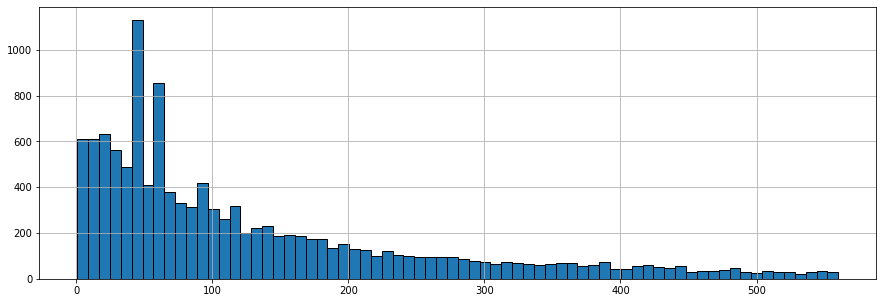

In [72]:
df['days_exposition'].hist(bins=70, figsize=(15,5), ec='black')

На графике можно заметить пиковые значения рядом с 0, а также между 0 и 100 днями. Рассмотрим эти данные ближе.

<AxesSubplot:>

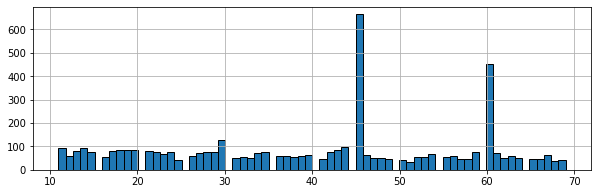

In [73]:
df.query('10 < days_exposition < 70')['days_exposition'].hist(bins=70, figsize=(10,3), ec='black')

Пиковые значения расположены на отметках 30, 45 и 60 дней. В соответствии с правилами Яндекс.Недвижимости объявления автоматически снимаются с публикции на 45 и 60 день с момента размещения.

Изучим данные и выявим есть ли зависимость цены от общей площади квартиры, числа комнат, этажа, удалённости от центра и даты размещения объявления. Начнём рассмотрение с общей площади квартиры.

0.7196707012576341

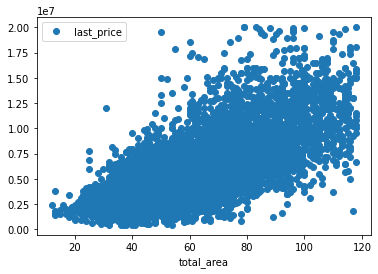

In [74]:
df.plot(x = 'total_area', y = 'last_price', style = 'o')
df['total_area'].corr(df['last_price'])

По распределнию точек видно, что с увеличением площади увеличивается и стоимость. Гипотеза о том, что с повышением площади увеличивается стоимость квартиры подтвердилась.

Убрала группировку и построила облако точек с ценой квартиры.

Изучим взаимосвязь между стоимостью квартиры и количеством комнат в ней.

In [75]:
pivot_table_rooms = df.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
display(pivot_table_rooms)

,mean,count,median
rooms,,,
0,2.939730e+06,168,2700000
1,3.983542e+06,5025,3800000
2,5.805633e+06,3998,5400000
3,7.268961e+06,2678,6600000
4,8.512935e+06,374,8200000
5,8.551304e+06,46,8550000
6,1.137600e+07,4,11045000
7,1.349000e+07,1,13490000


<AxesSubplot:xlabel='rooms', ylabel='last_price'>

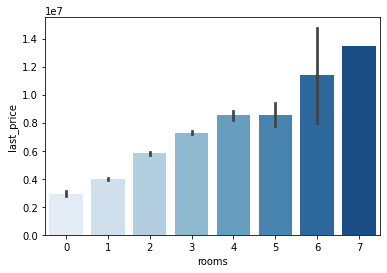

In [76]:
sb.barplot(x = df['rooms'], y = df['last_price'], palette = "Blues")

На графике хорошо заметно, что с увеличением количества комнат увеличивается и стоимость квартиры. Наблюдается прямая зависимость. Наша гипотеза, что с увеличением количества комнат стоимость квартиры увеличивается подтвердилась. Но в данных заметно, что пятикомнатные квартиры дешевле четырёхкомнатных, это выглядит странно. Но если в этом случае продают несколько комнат в коммунальной квартире, то такое значение может быть реальным.

Исправила этот шаг, исследую стоимость квартиры.

Теперь посмотрим наличие взаимосвязи стоимости квартиры и этажа расположения квартиры.

In [77]:
pivot_table_floor_category = df.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
display(pivot_table_floor_category)

,mean,count,median
floor_category,,,
другой,5.570051e+06,9584,4900000
первый,4.492822e+06,1262,4100000
последний,5.366893e+06,1448,4643000


<AxesSubplot:xlabel='floor_category', ylabel='last_price'>

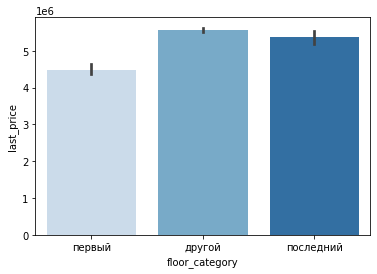

In [78]:
sb.barplot(x = df['floor_category'], y = df['last_price'], palette = "Blues")

На графике хорошо заметно, что самые дешёвые квартиры расположены на первом этаже. Квартиры на последнем этаже совсем немного дешевле квартир, расположенных на других этажах. Гипотеза подтвердилась полностью.

Изучим взаимосвязь стомости квартиры и её удалённость от центра.

-0.2888005835303544

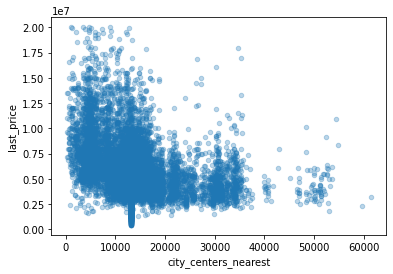

In [79]:
df.plot(kind = 'scatter', y = 'last_price', x = 'city_centers_nearest', alpha = 0.3)

df['city_centers_nearest'].corr(df['last_price'])

После перемены местами нескольких строчек кода всё в порядке, на графике облако точек.

Заметна зависимость стоимости квартиры от близости к центру - чем ближе к центру, тем выше стоимость. Гипотеза о том, что по мере удаления от центра снижается стоимость квартиры подтвердилась полностью.

Рассмотрим взаимосвязь даты публикации объявления и ценой квартиры.

In [80]:
pivot_table_weekday = df.pivot_table(index = 'weekday', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday.columns = ['mean', 'count', 'median']

pivot_table_weekday.sort_values('median', ascending = False)
display(pivot_table_weekday)

,mean,count,median
weekday,,,
воскресенье,5.297057e+06,898,4670000
вторник,5.550370e+06,2154,4900000
понедельник,5.379339e+06,1851,4700000
пятница,5.432466e+06,2152,4787000
среда,5.404082e+06,2025,4800000
суббота,5.385334e+06,994,4700000
четверг,5.481172e+06,2220,4800000


<AxesSubplot:xlabel='weekday', ylabel='last_price'>

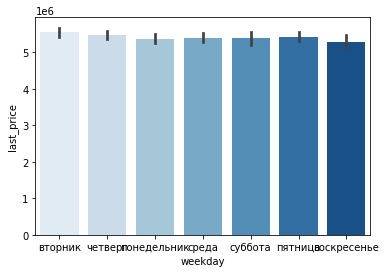

In [81]:
sb.barplot(x = df['weekday'], y = df['last_price'], palette = "Blues")

В воскресенье самая низкая цена, во вторник, среду и четверг цены почти одинаковы, в эти дни стоимость самая высокая. Полагаю, что стоимость выставленной на продажу недвижимости зависит от общей активности людей, так как в будние дни стоимость выше.

Рассмотрим взаимосвязь цены и месяца публикации объявления.

In [82]:
pivot_table_month = df.pivot_table(index = 'month', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_month.columns = ['mean', 'count', 'median']

pivot_table_month.sort_values('median', ascending = False)
display(pivot_table_month)

,mean,count,median
month,,,
1,5.320288e+06,797,4650000
2,5.437471e+06,1367,4840000
3,5.401278e+06,1144,4700000
4,5.497612e+06,873,4939000
5,5.363915e+06,676,4700000
6,5.377315e+06,970,4700000
7,5.368685e+06,973,4775000
8,5.502568e+06,994,4850000
9,5.736977e+06,1134,4950000


<AxesSubplot:xlabel='month', ylabel='last_price'>

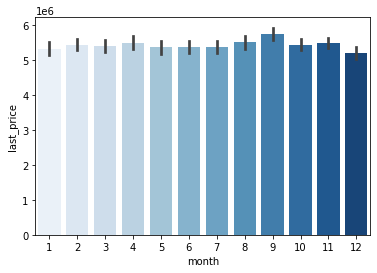

In [83]:
sb.barplot(x = df['month'], y = df['last_price'], palette = "Blues")

В сентябре цена самая высокая, в мае самая низкая. Вероятно, это связано с курортным сезоном в городе и сдачей квартир в аренду на этот период.

Изучим взаимосвязь цены и года публикации объявления.

In [84]:
pivot_table_year = df.pivot_table(index = 'year', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_year.columns = ['mean', 'count', 'median']

pivot_table_year.sort_values('median', ascending = False)
display(pivot_table_year)

,mean,count,median
year,,,
2014,1.380000e+07,1,13800000
2015,5.655371e+06,337,5130000
2016,5.545197e+06,1374,4800000
2017,5.471071e+06,4936,4772500
2018,5.319815e+06,5012,4690000
2019,5.706131e+06,634,5310000


<AxesSubplot:xlabel='year', ylabel='last_price'>

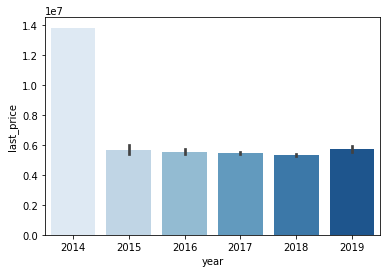

In [85]:
sb.barplot(x = df['year'], y = df['last_price'], palette = "Blues")

На графике видно, что в 2014 году стоимость квартир была самой высокой. Начиная с 2015 года цена немного колеблется. Вероятно, это связано с кризисом в 2014 году, после которого снизились финансовые возможности людей.

Итак:

**зависимость цены от дня недели** публикации практически никак не зависит. Тем не менее, в среднем цены на квартиры, объявление о продажи которых опубликовано в будние дни, чуть выше, чем цена на квартиры с объявлениями, опубликованными в выходные дни;
**зависимость цены от месяца публикации** - в сентябре встоимость квартр была выше: цены на квартиры, чьи объявления о продаже были опубликованы в сентябре, выше, чем по остальным месяцам. Самые низкие цены были в мае;
**зависимость цены от года публикации** - в 2014 году стоимость квартир была самой высокой. Вероятно, это связано с кризисом в 2014 году, снизилась покупальская способность людей. С 2015 года цена едва заметно изменяется.

Гипотеза о взаимосвязи стоимости квартиры и дня недели публикации объявления о продаже подтвердилась, наблюдается повышение цены на квартиры, опубликованные в будний день.

Выберим 10 населённых пунктов с наибольшим числом объявлений, посчитаем для них среднюю цену квадратного метра.

In [86]:
locality_pivot_table = df.pivot_table(index = 'locality_name', values = 'price_meter', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
display(locality_pivot_table)

,count,mean
locality_name,,
Санкт-Петербург,7948,111122.710996
посёлок Мурино,464,85820.030172
посёлок Шушары,351,77829.692308
посёлок Парголово,275,89379.509091
деревня Кудрово,262,92771.274809
Всеволожск,242,67951.855372
Пушкин,160,103717.318750
Колпино,147,75444.115646
Кудрово,135,97879.281481


Отсортировала данные по нужному столбцу.

Cамая высокая стоимость квадратного метра:

In [87]:
display(locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].max()])

,count,mean
locality_name,,
Санкт-Петербург,7948,111122.710996


Cамая низкая стоимость квадратного метра:

In [88]:
display(locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].min()])

,count,mean
locality_name,,
Всеволожск,242,67951.855372


Можно сделать вывод, что самая высокая стоимость жилья в Санкт-Петербурге, тогда как самая низка во Всеволжске.

Выделим территорию, которую следует считать центром Санкт-Петербурга.

,last_price
city_centers_nearest_km,
0,9.627472e+06
1,9.352695e+06
2,8.512953e+06
3,8.187386e+06
4,8.844261e+06


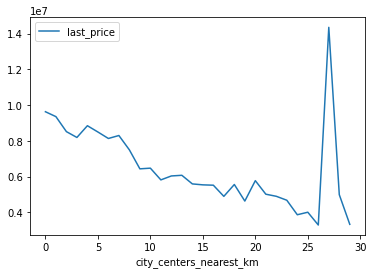

In [89]:
df['city_centers_nearest_km'] = df['city_centers_nearest']/1000
df['city_centers_nearest_km'] = df['city_centers_nearest_km'].astype('int')
pivot_table_km = df.query('locality_name == "Санкт-Петербург"').pivot_table(index = 'city_centers_nearest_km', values = 'last_price', aggfunc = 'mean')
pivot_table_km.plot()
display(pivot_table_km.head())

Исходя из графика центром Санкт-Петербурга следует считать территорию равную 9 км, так как на графике примерно на этой отметке начинается заметное падение, которое продолжается и далее.

Создадим новый датафрейм, в который поместим данные о квартирах в центре.

In [90]:
center_spb_df = df.query('city_centers_nearest_km <= 9 and locality_name == "Санкт-Петербург"')

Изучим зависимость стоимости квартиры в центре от количества комнат.

Странно, что не сохранились изменения, я исправляла все квадратные метры на общую цену. Сейчас выполнила снова.

0.44118626430535657

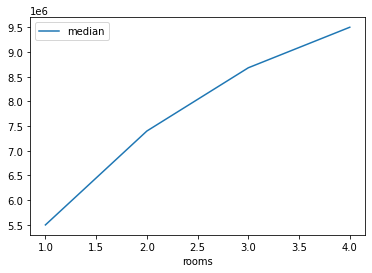

In [91]:
center_spb_rooms = center_spb_df.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
center_spb_rooms.columns = ['mean', 'count', 'median']
center_spb_rooms.query('count > 50').plot(y = 'median')

center_spb_rooms.query('count > 50').sort_values('median', ascending = False)

center_spb_df['rooms'].corr(center_spb_df['last_price'])

Так как коэфицент корреляции низкий, не следует связывать стоимость квартиры в центе с количеством комнат.

Теперь посмотрим на взаимосвязь этажа и стоимости квартиры.

<AxesSubplot:xlabel='floor_category'>

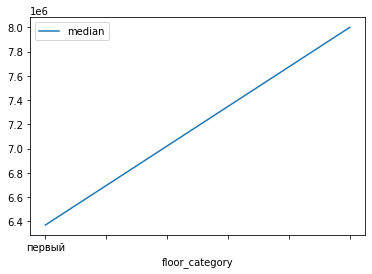

In [93]:
center_spb_floor_category = center_spb_df.query('floor_category != "другой"').pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
center_spb_floor_category.columns = ['mean', 'count', 'median']
center_spb_floor_category.plot(y = 'median')

Квартиры на первом этаже в центре немного дешевле, чем квартиры на последнем этаже. Данный результат не отличается от взаимосвязи этажа и стоимости квадратного метра по всему городу и области.

Рассмотрим взаимосвязь удалённости от центра и стотимости квартиры.

-0.22647858895330264

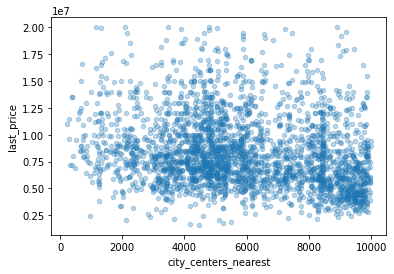

In [94]:
center_spb_df.plot(kind = 'scatter', y = 'last_price', x = 'city_centers_nearest', alpha = 0.3)

center_spb_df['city_centers_nearest'].corr(center_spb_df['last_price'])

Четкой зависимости нет, так как мы рассматриваем выборку по центру города.

Изучим взаимосвязь стоимости квартиры и даты размещения объявления. Начнём с дня недели.

<AxesSubplot:xlabel='weekday'>

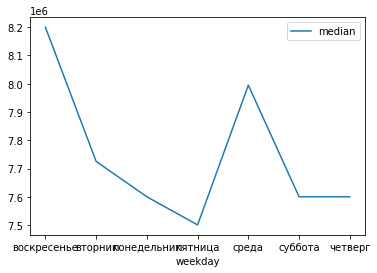

In [95]:
center_spb_weekday = center_spb_df.pivot_table(index = 'weekday', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
center_spb_weekday.columns = ['mean', 'count', 'median']
center_spb_weekday.plot(y = 'median')

Исходя из графика видно, что в пятницу стоимость квартир самая низкая, тогда как самая высокая в воскрсенье и чуть ниже в среду. Возможно, это связано с тем, что люди оставляют дела (в том числе и продажу квартиры) на конец недели и кто-то стремится закончить все дела до выходных, а кто-то занимается делами в субботу, оставив отдых на воскресенье. Данный результат отличается от всей выборки в части дня недели с самой низкой ценой.

Посмотрим взаимосвязь с месяцем размещения объявления.

,mean,count,median
month,,,
9,8.998693e+06,241,8200000.0
10,8.379942e+06,243,8000000.0
11,8.588547e+06,251,8000000.0
7,8.121548e+06,216,7975999.5
8,8.799936e+06,211,7920000.0
2,8.262904e+06,293,7850000.0
3,8.395909e+06,311,7800000.0
4,8.277206e+06,269,7600000.0
6,8.242510e+06,210,7547800.0


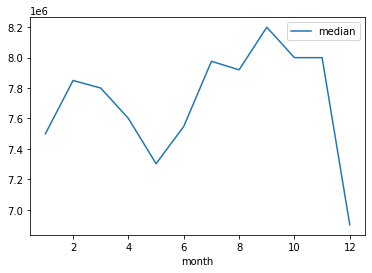

In [96]:
center_spb_month = center_spb_df.pivot_table(index = 'month', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
center_spb_month.columns = ['mean', 'count', 'median']
center_spb_month.plot(y = 'median')

center_spb_month.sort_values('median', ascending = False)

Наиболее дорогие квартиры в сентябре, а самые дешевые в декабре. Вероятнее всего, это связано с тем, что в декабре люди готовятся ко встрече Нового года и не совершают таких дорогих покупок.

Изучим взаимосвязь стоимости квартиры с годом публикайции объявления.

,mean,count,median
year,,,
2019,8.705931e+06,330,7980000
2018,8.197332e+06,989,7800000
2016,8.327817e+06,309,7700000
2015,8.292521e+06,93,7600000
2017,8.352488e+06,1024,7500400


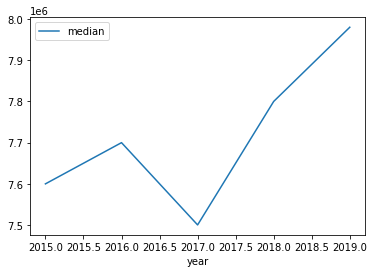

In [97]:
center_spb_year = center_spb_df.pivot_table(index = 'year', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
center_spb_year.columns = ['mean', 'count', 'median']
center_spb_year.query('count > 50').plot(y = 'median')

center_spb_year.query('count > 50').sort_values('median', ascending = False)

На графике видно, что во второй половине 2015 года была самая высокая стоимость квартир. Далее наблюдалось снижение цен, а с 2017 наблюдается рост стоимости квартир.Эти данные отличаются от остальной выборки.

### Вывод

Можно сказать, что результат анализа данных по центру Санкт-Петербурга немного отличается от всей выборки. Например, стоимость квартир по дню недели, месяцу или году размещению объявления совсем другая, а также не связана стоимость квадратного метра и количества комнат. Другие показатели не оличаются от средних по всей таблице.

## Общий вывод

**В ходе выполнения проекта:**

1. Мы обработали данные:
 - заполнили пропуски,
 - выявили выбивающиеся значения (выбросы), сделали предположения о природе их возникновения
 - удалили выбросы.
2. Ответили на все поставленные вопросы, для чего сделали сводные таблицы, построили различные графики, гистограммы. Добавили несколько новых столбцов в исходный датафрейм, которые облегчили работу. Выявили зависимость между стоимостью квартиры и различными показателями.

Стоимость квартиры зависит от количества комнат, этажа расположения, удалённости от центра. Есть небольшая зависимость между временем размещения объявления и стоимостью квартиры, так, например, в будние дни цена чуть выше.